In [2]:
from Bucket import Bucket
import os
import json

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bucket_path = '../private/result-buckets/'
grade_vs_salary = '../private/grade-vs-salary.json'
grade_vs_attendance = '../private/grade-vs-attendance.json'
TERM = ['1a', '1b', '2a', '2b', '3a', '3b', '4a']


In [4]:
def process_file(filename):
    with open(bucket_path + filename, 'r') as f:
        f = json.loads(f.read())
        b = Bucket.create_from_bucket(filename.replace('_buckets.json', ''), f)
        render_file(b)

In [5]:
def render_file(b):
    fig = plt.figure(figsize=(18, 16))    
    
    ax1 = fig.add_subplot(211)
    cols = []
    for val in b:
        if type(b[val]) == dict and 'message' in b[val]:
            continue
        elif type(b[val]) == dict and 'salaries' not in b[val]:
            continue

        cols.append(val)
        salaries = []
        
        salaries = [s.mean() for s in b[val].salaries]
        print salaries, val
        ax1.plot([1, 2, 3, 4, 5, 6], salaries) # add 7 for term
    ax1.legend(cols, loc='upper left')
    plt.show()

[2605.0, 4192.276315789473, 6072.809710526316, 7938.053052631579, 8703.046157894738, 9993.1256] Female
[2976.7681568181815, 4252.531211111111, 5877.093451111111, 7990.668426966291, 9439.583072222222, 10005.546059770113] Male


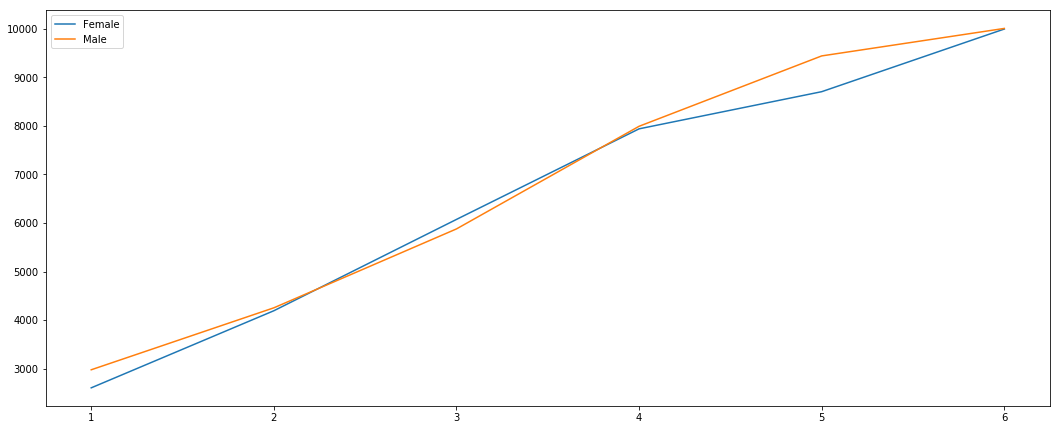

In [6]:
process_file('gender_buckets.json')

[3240.028625, 3986.3615000000004, 3866.1008, 7839.079111111111, 10112.918199999998, 7564.49] 3
[2903.0, 3864.0, 4391.09, 6858.1056, 10010.98, 9224.997120000002] 2
[2937.774642857143, 4113.28349122807, 6760.948522807017, 8542.992357142857, 9469.3593125, 10565.567228571428] 5
[2807.9163555555556, 4535.270657894737, 5329.770297368421, 7351.598717948717, 8865.124358974357, 9820.6620972973] 4


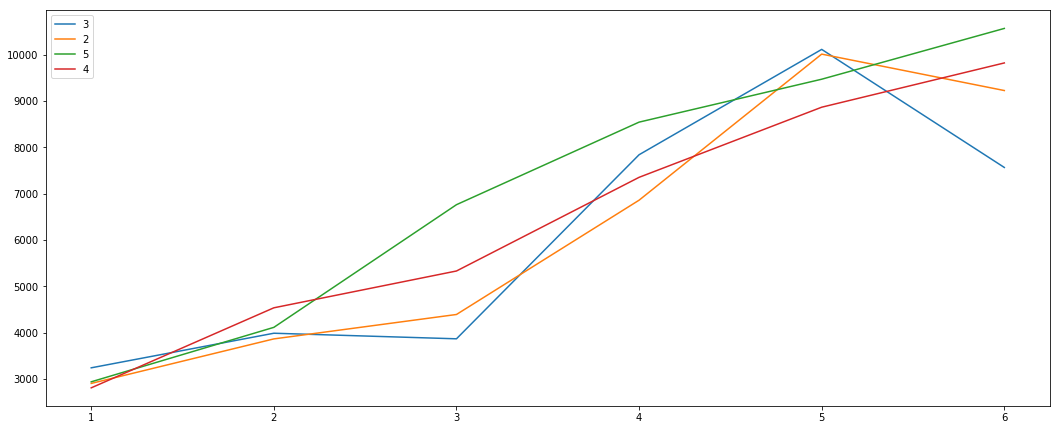

[2881.257303571428, 3932.764689655173, 5158.842244067798, 7724.067880701754, 9002.050660344827, 9619.832485714285] No
[2952.758955102041, 4574.628980769231, 6748.041229411766, 8263.27486153846, 9713.252215384615, 10459.330976] Yes


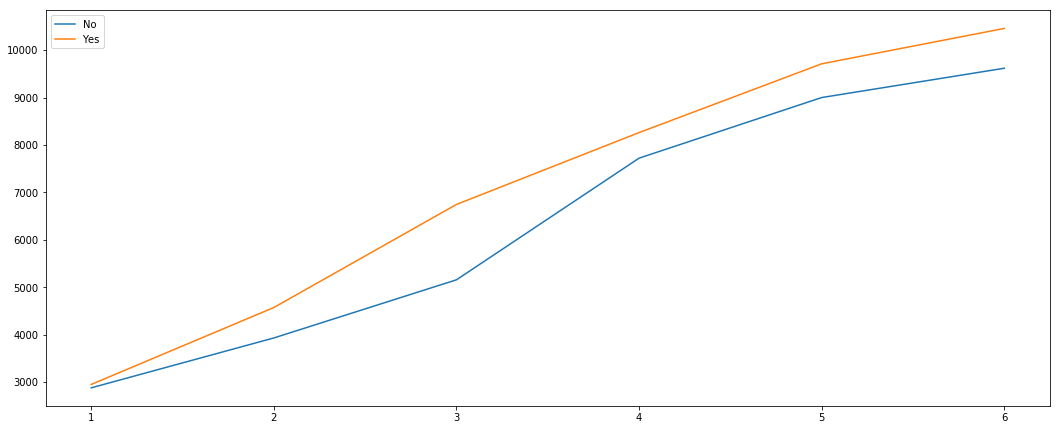

[2696.0, 3212.0, 3746.4, 6642.767999999999, 8389.768, 9451.248] Indian
[2866.6666666666665, 3173.3333333333335, 3333.3333333333335, 4980.404666666666, 6324.133333333334, 6036.933333333334] Dutch
[3040.0, 4386.625, 3840.0, 5342.35, 7426.648450000001, 8505.173333333334] Korean
[2899.5, 4279.857142857143, 5576.257492857143, 8003.932142857143, 9703.263057142856, 10152.065714285714] East Indian
[2600.0, 6956.333333333333, 8108.175375, 9390.0424, 12262.751250000001, 11691.5376] Filipino
[2794.632, 4275.8714, 5688.317673076923, 8201.41683076923, 8783.929684, 10185.903630769231] Canadian
[2033.3333333333333, 3781.558333333333, 5044.2925, 9053.72, 8245.4576, 10751.432] Scottish
[2903.1111111111113, 4252.216666666666, 6729.3613888888885, 9855.17425, 9862.3091125, 9501.679644444444] English
[2368.0, 3631.558333333333, 4123.3675, 9997.496000000001, 6853.674400000001, 10089.096] Irish
[3082.6552723404257, 4184.210239999999, 6020.386758000001, 8066.282538775509, 9686.936102, 9438.983339130435] Chine

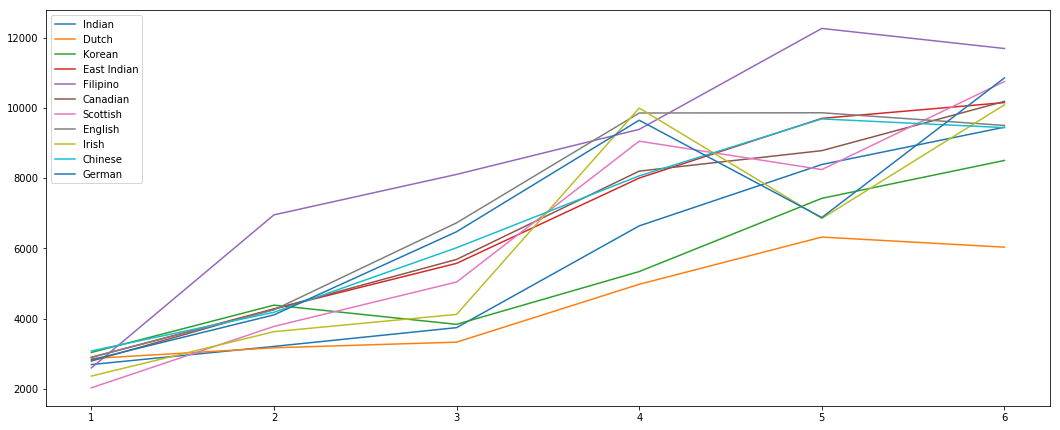

[2954.786424657534, 4432.290533333333, 6220.966653947369, 8256.362502702703, 9794.270718666667, 10502.833485714285] macOS
[2702.4117647058824, 3494.157894736842, 4090.4827368421056, 6430.622947368421, 6832.562357894736, 8527.910800000001] Windows
[2959.6792533333337, 4198.1418125, 6533.943826666666, 8550.5938, 10176.19155, 9745.038] Linux


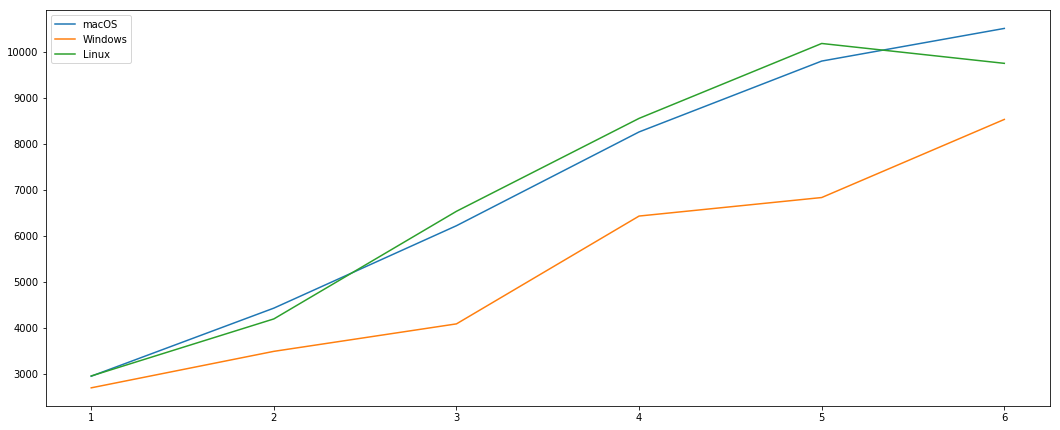

[2523.714285714286, 3967.0, 6589.45275, 6722.4400000000005, 8329.457612499999, 11448.234400000001] Full-stack
[2983.75, 4197.0466875, 5182.969625, 8443.1346, 8090.69423125, 9312.060586666666] AI
[2920.0, 4878.583333333333, 3932.0, 6757.7356666666665, 7730.241633333332, 8694.330666666667] Graphics
[2648.25, 4644.0, 6588.783583333333, 8343.568266666667, 11774.084166666666, 11728.9184] Design
[4226.73, 5480.023, 6484.583583333333, 9902.001666666665, 8780.99, 7890.693333333333] PM
[2043.0, 2706.6666666666665, 4450.602666666667, 7652.928, 8046.168000000001, 6696.6613333333335] Embedded
[3026.6666666666665, 5833.166666666667, 4173.333333333333, 7262.666666666667, 9271.887999999999, 11066.880000000001] Mobile
[2786.6666666666665, 3614.6666666666665, 5531.5464999999995, 10148.75, 11141.238666666666, 11449.464000000002] Machine learning
[3034.568421052632, 4027.5331904761906, 5270.458614285714, 9006.16817142857, 8840.191004761906, 9763.465752380953] Frontend
[3110.6, 4381.87, 5564.402599999999,

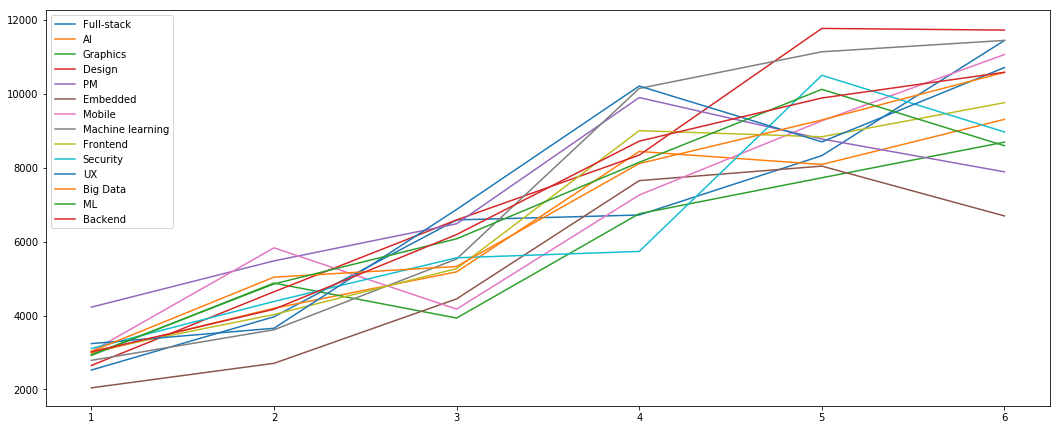

[2703.156629629629, 4123.600444444444, 5037.315769230769, 6457.592538461539, 9306.844133333334, 10165.770688] 0h / month
[4175.396266666667, 4874.933333333333, 6505.283333333333, 9477.644266666668, 9026.591666666667, 8520.266666666668] 30-40h / month
[2813.567857142857, 4090.099327868852, 5897.857840322579, 8300.824452459015, 9316.638239344264, 10041.806318644067] 1-10h / month
[3248.8, 4536.0, 5350.122, 6855.8928, 8378.80826, 9175.6256] 20-30h / month
[3642.264444444444, 4972.165333333333, 7348.217388888889, 9385.95888888889, 10716.23211111111, 9863.431999999999] 10-20h / month
[2788.0, 4618.7, 7896.7964999999995, 9705.68752, 8437.684799999999, 10971.3024] 40h+ / month


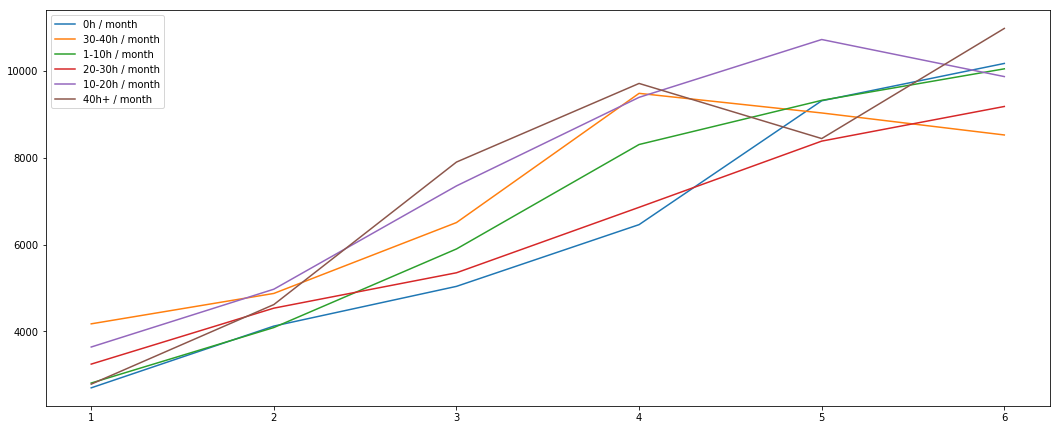

[3363.6876444444442, 5238.627777777778, 6685.153, 8963.1016, 8313.635, 10849.071000000002] 11:30
[2627.865321428571, 4667.210758620689, 6015.274251724138, 8127.675779310345, 9988.789333333332, 10338.141020689653] 12:00
[2891.5, 3947.527777777778, 6779.436549999999, 7909.397422222221, 8801.857783333333, 10279.299022222223] 2:00
[2220.0, 3517.6, 3860.0, 7737.248000000001, 10787.737000000001, 10674.400000000001] 10:00
[2911.1111111111113, 4500.296555555556, 6575.866655555556, 9314.377777777778, 10317.595949999999, 10044.9476] 11:00
[2991.1428571428573, 3652.0914285714284, 5064.612571428572, 7757.506285714285, 10360.676571428572, 10708.823314285715] 3:00
[3147.144545454546, 3942.325565217391, 6082.066043478261, 7479.408434782608, 9362.358252173912, 9846.990181818184] 1:00


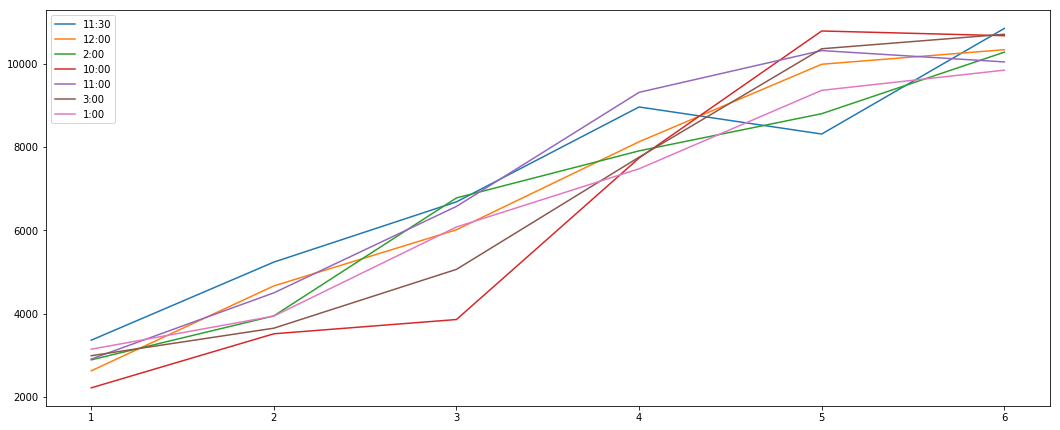

[2716.153846153846, 3868.6153846153848, 5256.463230769231, 5991.402461538461, 9600.319176923076, 8916.347345454544] 92
[2520.0, 3905.0, 5457.7294999999995, 5223.893, 8565.19175, 10689.04] 98
[3238.2736, 4239.311111111111, 4451.427777777778, 6853.731599999999, 7837.461555555555, 8693.263111111111] 91
[2986.6666666666665, 3801.818181818182, 6000.875863636364, 6988.786181818182, 8529.513690909092, 8935.226133333334] 90
[2672.909090909091, 4323.871636363637, 7201.638318181817, 7035.9932, 8718.626627272726, 10253.4048] 93
[2998.3333333333335, 4292.125, 6874.296741666666, 10789.277833333332, 11206.2275, 10691.769600000001] 96
[2634.3333333333335, 4194.855625, 5720.09533125, 8039.683375, 9295.059666666666, 11100.576] 95
[2836.9904761904763, 4383.609380952381, 5350.373700000001, 8839.824457142859, 8737.355728571429, 10794.78803809524] 94
[2542.25, 4870.51725, 8072.5621, 10740.3675, 12332.07225, 10254.058666666666] 97


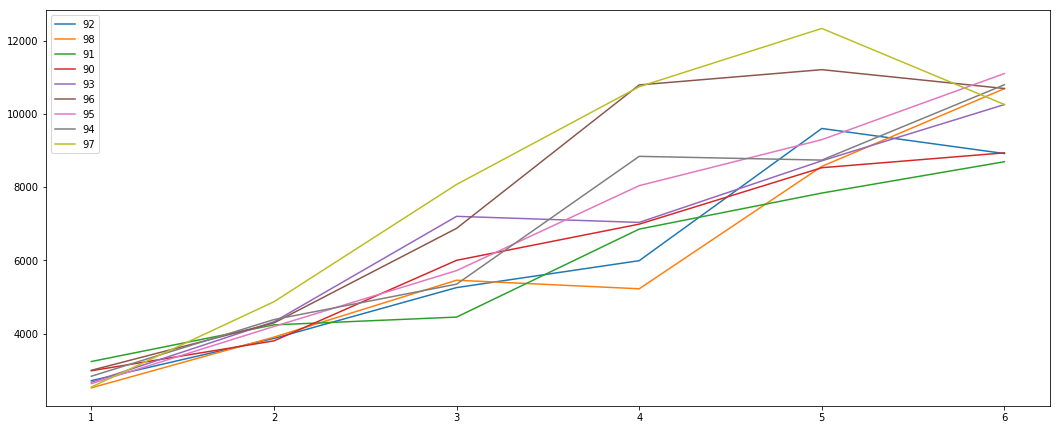

[2903.399512195122, 3921.738761904762, 6556.656474418605, 7378.468895238094, 9810.247253488371, 9779.10632] iPhone
[2927.358351612903, 4446.061075757576, 5528.239487692306, 8448.50812923077, 9171.037255384615, 10258.958050000001] Android


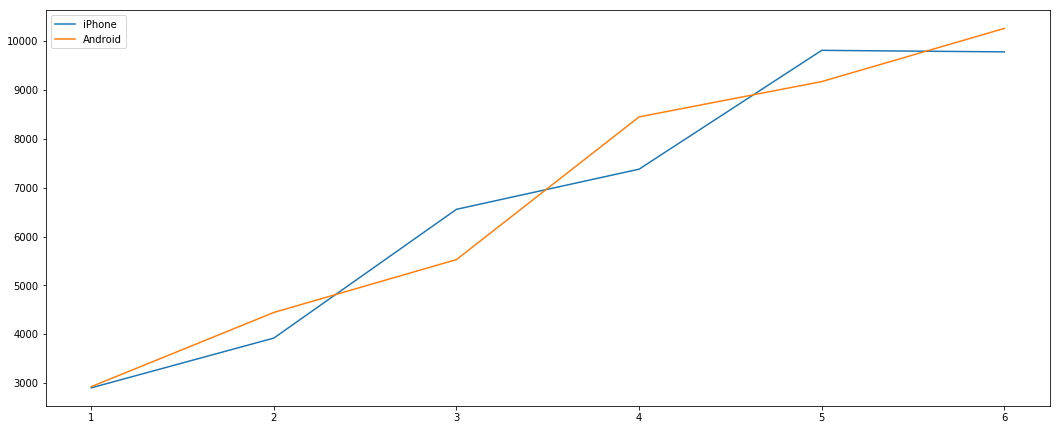

[2918.9832432432436, 4492.9377631578955, 5703.278826315789, 8132.310621052631, 9514.588892105263, 10637.980237837839] 6-10
[2937.287343478261, 3847.421333333333, 5934.9580875, 7314.868051063829, 8916.486827083332, 9406.546008510639] 2-5
[2843.714285714286, 4516.554545454546, 6393.600522727273, 9174.961818181819, 10294.936722727274, 10570.17184] >10


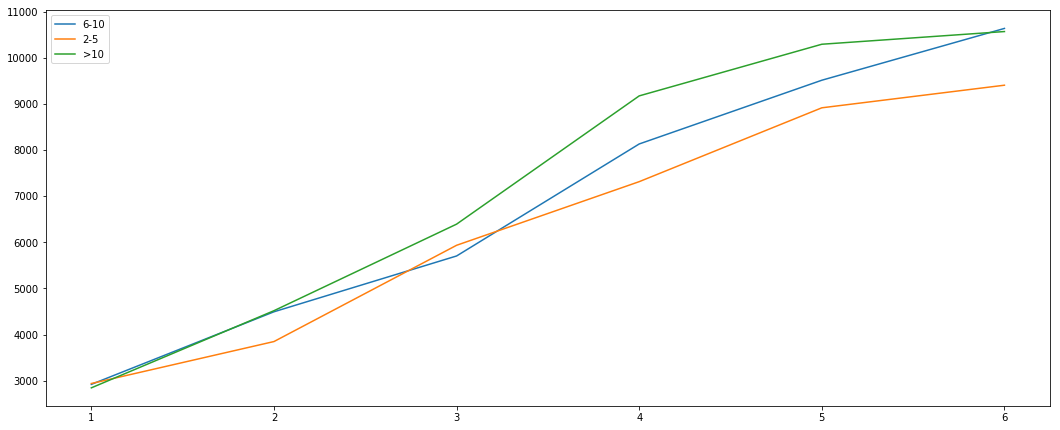

[2700.913043478261, 3141.8333333333335, 4875.775729166667, 6317.309749999999, 8309.156343478262, 9075.1456] Java
[2880.5714285714284, 5959.492857142856, 5870.697999999999, 10035.110285714285, 9221.795328571428, 10606.957714285714] Scala
[3226.6136592592597, 4096.180000000001, 6298.715375, 8141.740992592593, 10039.418889285715, 10693.3968] Python
[2786.3333333333335, 5790.294833333333, 7740.030616666666, 7482.899999999999, 8798.949999999999, 11260.087040000002] Ruby
[2910.628571428572, 3956.883625, 6276.437199999999, 8812.260776470588, 9287.716058823527, 10149.619388235295] JavaScript
[2904.0, 4783.6849999999995, 5936.270777777778, 7354.268888888889, 7431.44498, 8587.0544] C++
[2714.5714285714284, 4592.3125, 7600.3947499999995, 10095.69975, 12102.163249999998, 13384.0992] Golang


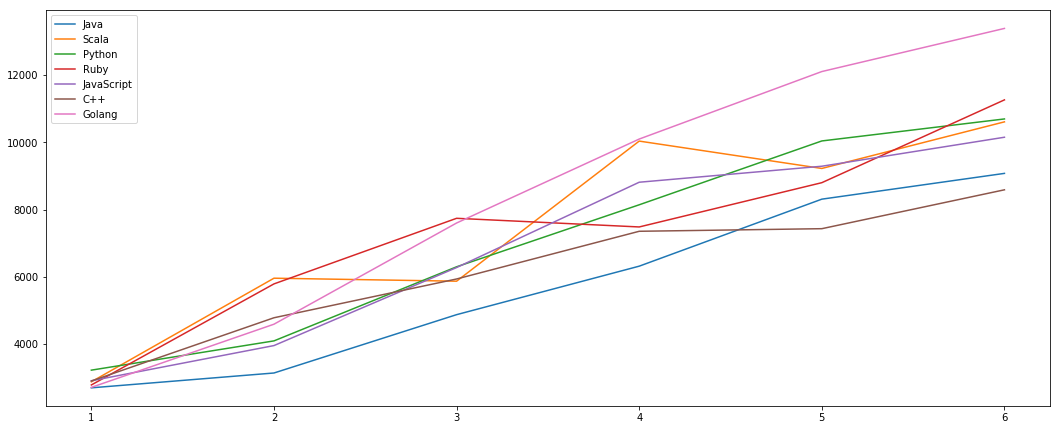

[3074.477914285714, 4281.52924, 6550.947466666667, 8865.52452, 9950.85979607843, 10699.033266666667] Few times a week
[2938.4615384615386, 4153.284384615385, 5159.9447692307685, 7005.098923076923, 9912.125446153845, 8881.952246153847] Few times a year
[2688.2207142857146, 4358.4766666666665, 5801.738743333333, 7487.739931034483, 8774.61842413793, 10283.105655172414] Few times a month
[2937.777777777778, 4013.090909090909, 4654.338, 6922.315636363636, 7630.592345454546, 7865.636363636364] Never
[2579.3333333333335, 3835.6, 4458.108333333334, 7054.953333333334, 8742.687166666667, 9585.225600000002] Daily


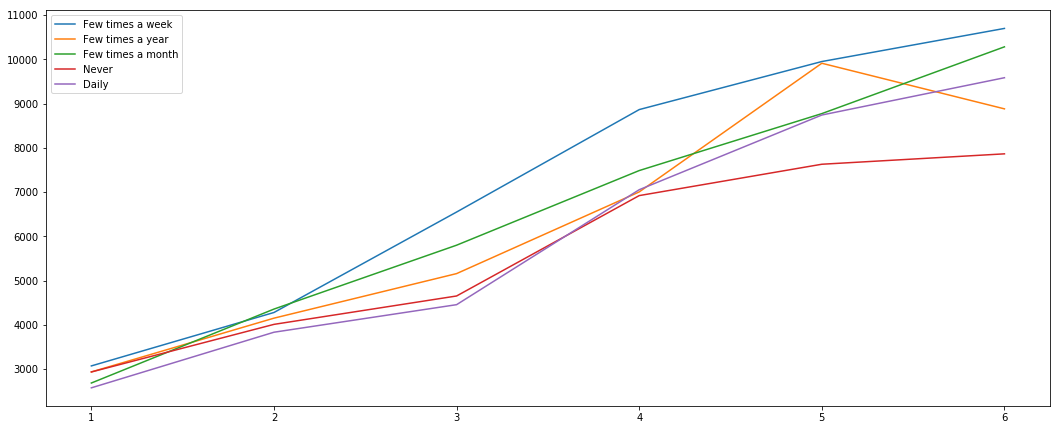

[2605.0, 4192.276315789473, 6072.809710526316, 7938.053052631579, 8703.046157894738, 9993.1256] Female
[2976.7681568181815, 4252.531211111111, 5877.093451111111, 7990.668426966291, 9439.583072222222, 10005.546059770113] Male


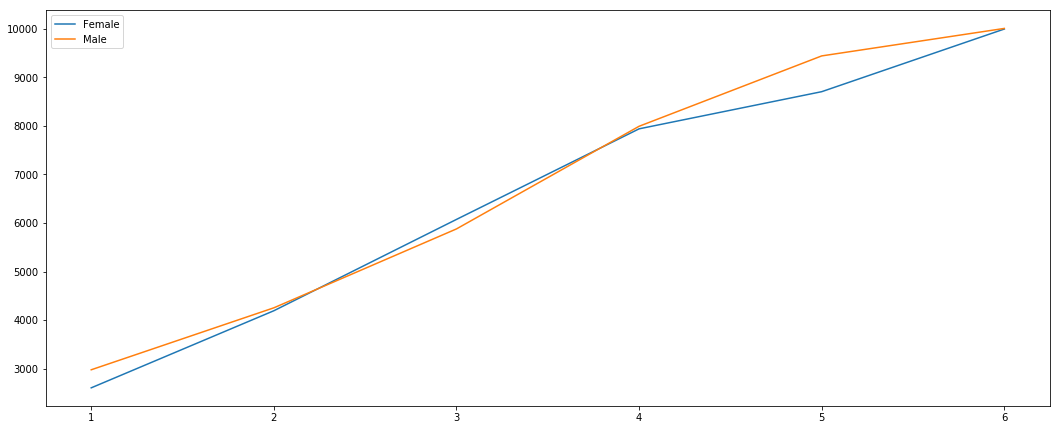

[3125.0914461538464, 3849.4769230769234, 9636.902953846153, 10084.131753846152, 11675.288884615384, 12358.717066666666] 6-10
[2869.820126760563, 4475.285972972973, 5375.620962162162, 7933.932871232876, 9444.049083783784, 9742.73796056338] 1-5
[2652.458823529412, 3614.0366842105263, 4874.130578947367, 6568.751578947367, 7489.725094736842, 9022.22105263158] 0
[4140.094999999999, 4025.0, 8209.406125, 8721.2674, 8566.222249999999, 12553.992000000002] >10


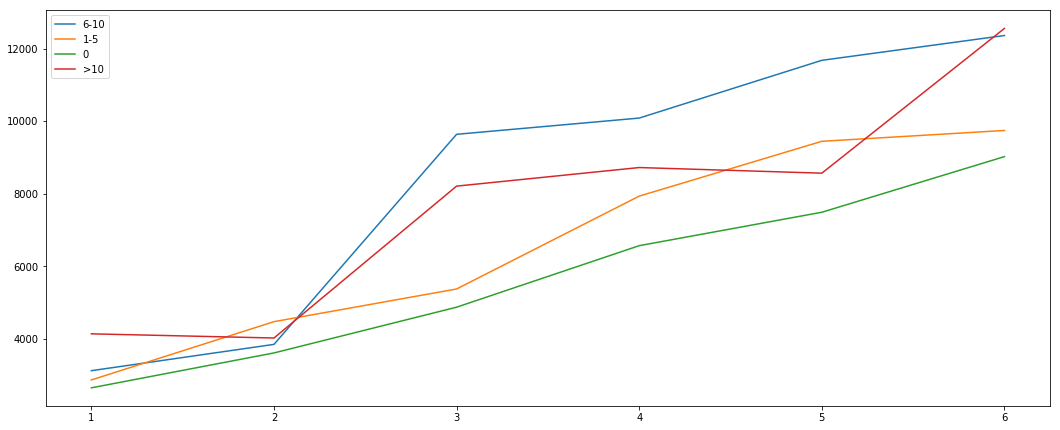

[3011.647802173913, 4402.091147368421, 6168.631527368418, 8332.357789473683, 9505.957647368421, 10374.87105376344] No
[2228.0, 3185.4933333333333, 4166.786666666667, 5599.155142857143, 8276.138466666665, 7447.243076923077] Yes


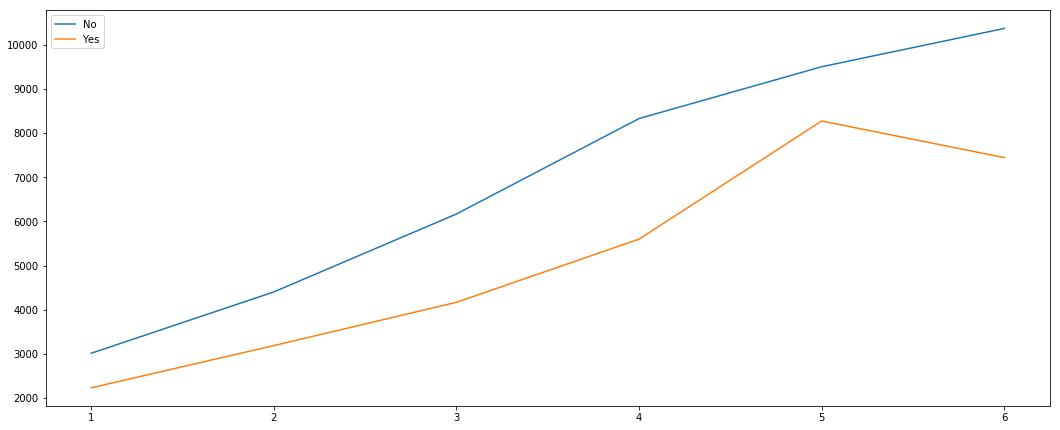

[2800.0, 3226.6666666666665, 6643.806, 5737.6213333333335, 6033.674666666666, 7650.357333333333] 11
[3789.455542857143, 5199.842857142858, 8106.085714285714, 11439.726114285713, 10816.812414285714, 11185.953828571428] 13
[2780.0, 3911.7, 3370.5, 7352.5488, 10719.243359999999, 11180.480000000001] 12
[2968.675148148148, 4056.87462962963, 5235.223792592593, 7667.403185185185, 9424.030003846154, 9342.475815384618] 15
[2830.909090909091, 4534.783545454546, 6617.576609090908, 8604.006360000001, 9093.923145454546, 10500.863709090909] 14
[2801.0, 3351.925, 5753.029125, 7041.65, 9515.550875, 10507.8276] 17
[2813.8384615384616, 4567.180925925925, 6207.827892857143, 8280.761628571428, 9167.681110714286, 10356.95956923077] 16
[2881.892, 3910.54, 5927.94125, 7594.543733333334, 10477.2320625, 9701.457257142858] 18


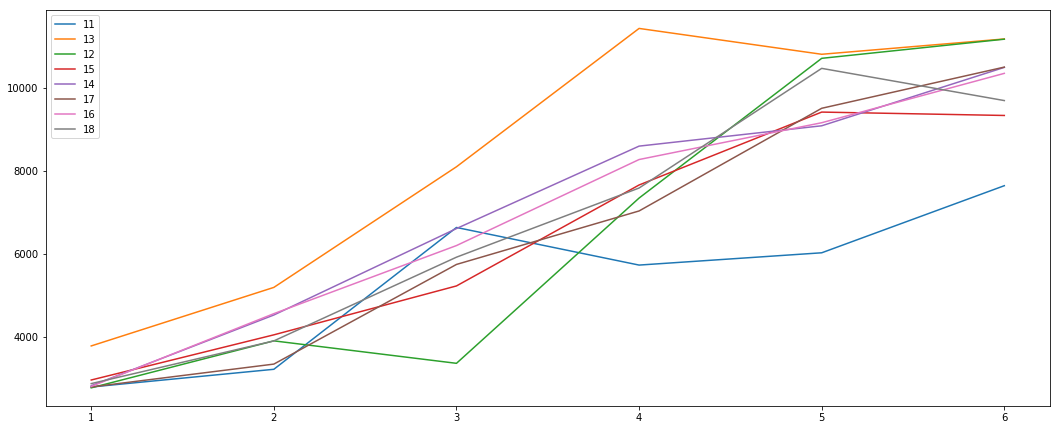

[2760.0, 3112.0, 3898.6666666666665, 8290.472533333334, 12373.258800000001, 11367.1072] Sublime text
[2344.7, 3976.7545454545457, 6254.211209090908, 7350.628181818182, 8884.672545454545, 11516.404] IntelliJ
[2789.3333333333335, 4736.255666666666, 5452.647766666666, 7177.403600000001, 10029.745526666666, 9971.699200000001] Atom
[3573.425991304348, 5234.1285, 7726.099491666665, 10145.216283333333, 10798.785858333333, 10937.963885714289] Vim
[3020.0, 4014.207142857143, 4605.212416666666, 7061.391085714285, 6085.3114, 9135.06742857143] VS Code
[2941.0, 3949.7333333333336, 4906.483333333334, 7160.418000000001, 9677.8468, 10323.392533333334] JetBrains
[2916.5, 3000.0, 3000.0, 2900.0, 5447.84, 7453.0773333333345] Notepad++
[2759.195, 3763.261666666667, 5292.106202380952, 7448.8310999999985, 8866.200707317073, 9229.21884] Sublime


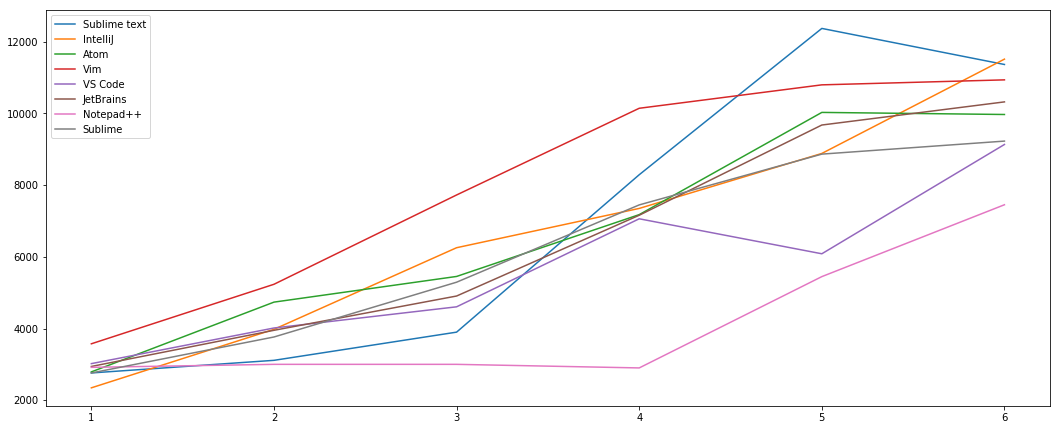

[2906.0, 4761.714285714285, 5556.219999999999, 7412.277714285714, 8343.509614285715, 9764.903314285717] 200k-250k
[2784.3125, 3748.6522222222225, 5773.721029411764, 8631.928555555556, 9248.332105882353, 10588.096000000003] 150k-200k
[3030.173413793104, 4428.745258064516, 6267.408351612902, 7950.011096774193, 9595.783503225808, 10526.187303225804] 50k-100k
[2358.4, 4281.1, 5228.18, 10356.9585, 11238.057359999999, 10846.800000000001] >250k
[2468.0, 3460.0, 4784.2549, 6835.94192, 10997.721, 9904.119999999999] 0-50k
[2921.70944, 3576.952238095238, 5355.3805, 7086.118038095237, 8755.859604761907, 8562.8264] Not sure / prefer not to disclose
[3074.0600000000004, 4959.161695652175, 6444.173904166666, 8340.658156521738, 9127.525345833334, 10119.704278260871] 100k-150k


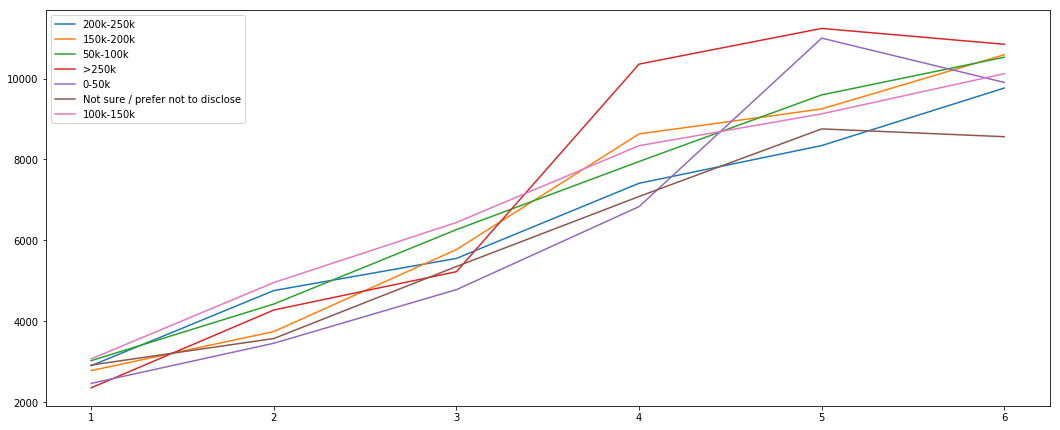

[2843.1509463414636, 4294.205755555556, 6204.348802173914, 7762.507297777778, 9053.964162222223, 10268.22801860465] Bachelor's
[2801.9777777777776, 4001.570888888889, 5836.24961111111, 6830.874444444444, 8431.234, 8515.777777777777] Postsecondary diploma (e.g. college)
[2286.0, 3352.0, 7512.251749999999, 10863.036533333332, 8502.56925, 11209.408000000001] Did not complete high school
[3038.463394736842, 4087.1105641025633, 5507.549668421053, 8427.62123076923, 9865.651166666667, 10131.501599999998] Master's/Professional (MD, MBA, etc)
[4840.0, 5180.3, 10147.73, 8554.0, 8588.52245, 9678.030933333333] High school
[2929.222222222222, 4679.194444444444, 4918.23881111111, 7888.569555555554, 9530.313866666667, 10149.109511111112] Doctorate


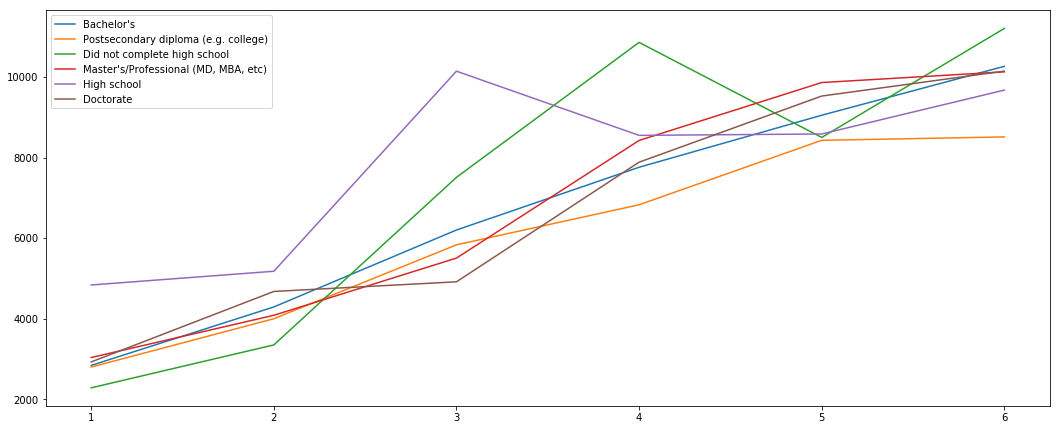

[2925.215263157895, 3824.501461538462, 5968.116112820512, 7848.67152631579, 9400.104863157896, 10084.707718918919] Few times a week
[2572.0, 4001.836090909091, 3585.040909090909, 6778.690363636363, 8305.26589090909, 9640.4864] Few times a year
[2894.084184615385, 3786.6157142857146, 5775.386165517242, 7611.352482758621, 8803.144906896552, 9887.45219310345] Few times a month
[3025.4, 5166.306666666667, 6085.037966666666, 9018.819866666667, 9350.884753333334, 9887.857600000001] Never
[3033.1393125, 5252.086176470588, 7348.003024999999, 8820.970625, 10770.098252941176, 10472.276053333335] Daily


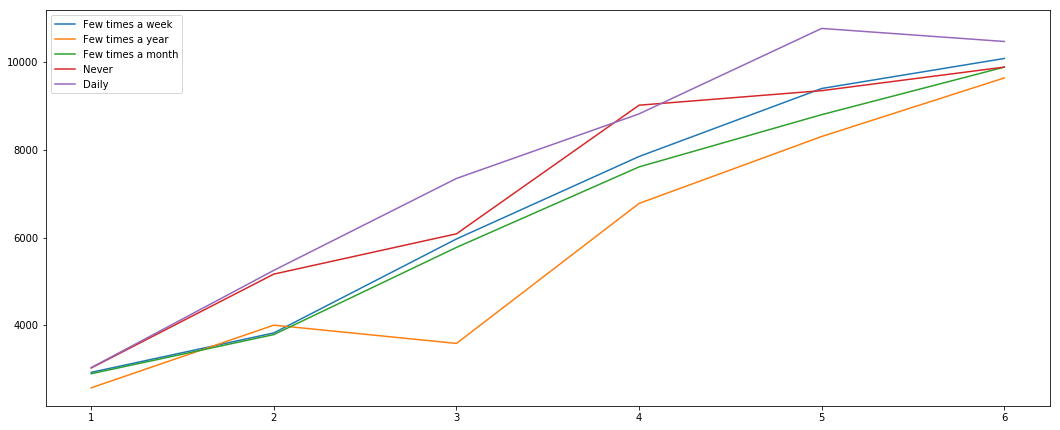

In [7]:
for i in os.listdir(bucket_path):
    if i.startswith('.'):
        continue
    process_file(i)

In [8]:
def render_grade_vs_salary(data, term, axis='cumulative_avg'):
    """Creates a scatter plot of the data of a term.
    
    `axis` represents the x axis that's plotted against salary.
    """
    x = []
    y = []
    for salary in data:
        for item in data[salary]:
            x.append(item[axis])
            y.append(item['result_salary'])
    plt.xlim(60, 100)
    plt.scatter(x, y)
    print('Term: ' + term)
    print(np.corrcoef(x, y)[0, 1])
    plt.title('Cumulative average vs Salary, ' + str(term) + 'th coop')
    plt.show()

Term: 1
0.2364562021650012


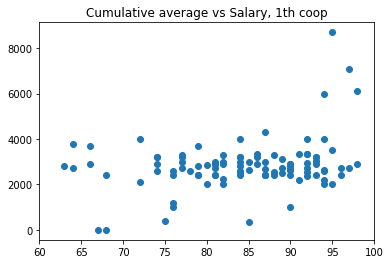

Term: 2
0.23161596874707194


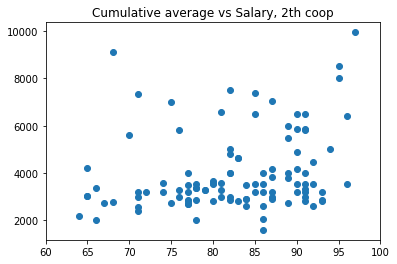

Term: 3
0.18636222829213395


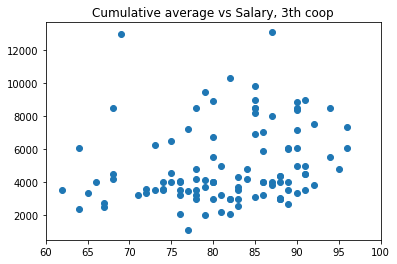

Term: 4
0.09514875558789497


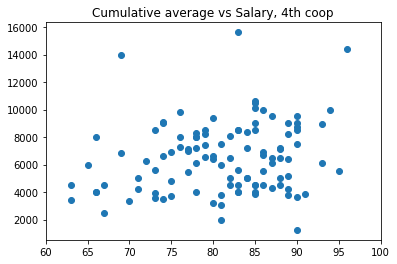

Term: 5
0.18395857015444955


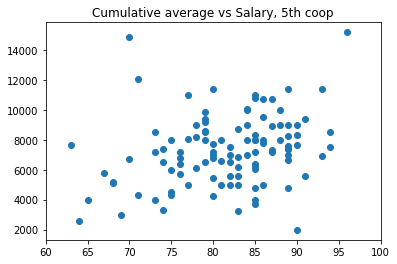

Term: 6
-0.05676787581307533


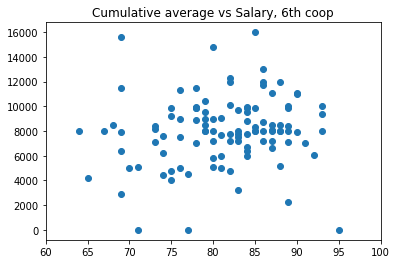

In [14]:
from collections import defaultdict
with open(grade_vs_salary, 'r') as f:
    data = json.loads(f.read())
    for term in range(1, len(data)+1):
        pass
        render_grade_vs_salary(data[str(term)], str(term))
    results = []
    for i in range(0, 6):
        temp = []
        for j in range(0, 10):
            temp.append(defaultdict(int))
        results.append(temp)
        
    # First index: cumulative grade / 10
    # Second index: salary / 1000
    for term in range(1, len(data)+1):
        for i in data[str(term)]:
#            print len(data[str(term)][i])
            for item in data[str(term)][i]:
                # print '\t', term-1, grade/5-10, salary/500
                grade = int(item['cumulative_avg'])
                salary = int(item['result_salary'])                
                if grade <= 0 or salary <= 0:
                    continue
                results[term-1][grade / 5 - 10][salary / 500] += 1
#     print json.dumps(results, indent=True)
    # X domain: 50-100
    # Y domain: 31
    
    items = []
    for a, t in enumerate(results):
        for x, g in enumerate(t):
            for s in g:
                items.append({
                  'x': x * 5 + 50,
                  'y': s * 500,
                  'size': g[s],
                  'term': a
                })
    
    items = sorted(items, reverse=True, key=lambda x: x['size'])
#    print json.dumps(items)

In [11]:
from scipy.interpolate import interp1d
import math

In [12]:
def render_grade_vs_attendance(data, term):
    x = []
    y = []
    legend = []
    legend_values = {
        '4': 'Attends almost all classes',
        '3': 'Attends most classes',
        '2': 'Sometimes attends class',
        '1': 'Rarely attends class'
    }
    max_val = []
    for i in range(1, 5):
        rating = data.get(str(i), [])
        grades = [0] * 6
        for g in rating:
            if g < 60 or g == 'exchange':
                continue
            index = int(math.floor((float(g) - 60) / (40.0 / 6))) # Normalize to range 0-7
            grades[index] += 1
        if sum(grades) < 5:
            continue
        legend.append(legend_values[str(i)])
        grades = list(map(lambda x: float(x) / sum(grades) * 100, grades))

        x = [num for num in range(60, 100, 7)]
        f = interp1d(x, grades, kind='cubic', fill_value='extrapolate')
        xnew = np.linspace(63, 100, num=40)
        max_val.append(max(f(xnew)))
        plt.plot(xnew, f(xnew))
        
    plt.xlim(60, 100)
    plt.ylim(0, 60)
    plt.legend(legend)
    plt.title('Attendance vs Term Average, ' + TERM[term])
    plt.show()

In [64]:
with open(grade_vs_attendance, 'r') as f:
    data = json.loads(f.read())
    for i, t in enumerate(TERM):
        # render_grade_vs_attendance(data[t], i)
        pass 

    from collections import defaultdict
    import json
    AVGS = [
        84.08990990990992,
        80.59818181818181,
        81.41441441441441,
        79.57882882882883,
        83.34726415094339,
        79.8177358490566,
        83.44225225225226
    ]
    results = []
    for i in range(0, 4):
        results.append(defaultdict(int))

    for term in data:
        for rating in data[term]:
            for grade in data[term][rating]:
                if grade == 'exchange' or float(grade) < 60:
                    continue
                results[int(rating)-1][int(float(grade) - AVGS[TERM.index(term)]) / 5] += 1
    for a, i in enumerate(results):
        for j in i:
            print {'x': a, 'y': j, 'size': i[j]} ,','

{'y': 0, 'x': 0, 'size': 30} ,
{'y': 1, 'x': 0, 'size': 13} ,
{'y': 2, 'x': 0, 'size': 3} ,
{'y': -1, 'x': 0, 'size': 17} ,
{'y': -3, 'x': 0, 'size': 4} ,
{'y': -2, 'x': 0, 'size': 6} ,
{'y': 0, 'x': 1, 'size': 37} ,
{'y': 1, 'x': 1, 'size': 27} ,
{'y': 2, 'x': 1, 'size': 13} ,
{'y': 3, 'x': 1, 'size': 2} ,
{'y': -1, 'x': 1, 'size': 29} ,
{'y': -4, 'x': 1, 'size': 5} ,
{'y': -3, 'x': 1, 'size': 5} ,
{'y': -2, 'x': 1, 'size': 17} ,
{'y': 0, 'x': 2, 'size': 79} ,
{'y': 1, 'x': 2, 'size': 61} ,
{'y': 2, 'x': 2, 'size': 18} ,
{'y': 3, 'x': 2, 'size': 1} ,
{'y': -2, 'x': 2, 'size': 37} ,
{'y': -5, 'x': 2, 'size': 1} ,
{'y': -4, 'x': 2, 'size': 8} ,
{'y': -3, 'x': 2, 'size': 18} ,
{'y': -1, 'x': 2, 'size': 59} ,
{'y': 0, 'x': 3, 'size': 80} ,
{'y': 1, 'x': 3, 'size': 54} ,
{'y': 2, 'x': 3, 'size': 28} ,
{'y': -2, 'x': 3, 'size': 30} ,
{'y': -4, 'x': 3, 'size': 8} ,
{'y': -3, 'x': 3, 'size': 16} ,
{'y': -1, 'x': 3, 'size': 54} ,


## Performing an ANOVA of specific data sets.

In [12]:
import scipy.stats as stats
from collections import defaultdict

### Coop Correlations
- Technical background
  - Coding start age
  - Hackathons
  - side projects 
- Background
  - Parental education
  - Admission average
  
### Academic Correlations:
- Admission average
- Parents education

In [42]:
def correlate_code_start_age(content, dv):
    """dv: dependent variable."""
    shs = content[dv]
    values = defaultdict(list)
    values[14].extend(shs['9'])
    values[14].extend(shs['10'])
    values[14].extend(shs['11'])
    values[14].extend(shs['12'])
    values[14].extend(shs['13'])
    values[14].extend(shs['14'])
    values[15].extend(shs['15'])
    values[16].extend(shs['16'])
    values[17].extend(shs['17'])
    values[17].extend(shs['18'])
    values[17].extend(shs['19'])

    print('CALCULATING ' + dv.upper())
    fh = values[14] + values[15]
    sh = values[16] + values[17]
    print('Ages <=15, >15')
    print(stats.f_oneway(fh, sh))
    print(stats.kruskal(fh, sh))
    print(np.mean(fh), np.mean(sh))
    print(np.std(fh), np.std(sh))
    print('[Count] Younger than 16: ' + str(len(fh)) + ', At least 16: ' + str(len(sh)))
    print('')
    print(sorted(fh))
    print(sorted(sh))

In [43]:
def extract_range(content, ranges):
    result = []
    for r in ranges:
        current = []

        for val in content:
            if int(val) > r[0] and int(val) <= r[1]:
                current.extend(content[val])
        print r, len(current)
        result.append(current)
    return result

In [44]:
def extract_groups(content, groups):
    result = []
    for r in groups:
        current = []

        for val in content:
            if val.strip() in r:
                current.extend(content[val])
        print r, len(current)
        result.append(current)
    return result

In [45]:
def dict_to_lol(content):
    # list of lists im not a bad programmer
    lol = []
    for i in content:
        lol.append(content[i])
    return lol

In [46]:
def load_file(col_name):
    with open(bucket_path + col_name + '_buckets.json', 'r') as f:
        return json.loads(f.read())

In [47]:
# Code start age
content = load_file('code_start_age')
correlate_code_start_age(content, 'first_half_grades')
correlate_code_start_age(content, 'second_half_grades')

correlate_code_start_age(content, 'first_half_salaries')
correlate_code_start_age(content, 'second_half_salaries')


CALCULATING FIRST_HALF_GRADES
Ages <=15, >15
F_onewayResult(statistic=1.010900093484944, pvalue=0.31693467394518826)
KruskalResult(statistic=1.5483371696092163, pvalue=0.21338108763307484)
(82.17986842105265, 80.65575471698114)
(8.456075056164886, 7.189968404438046)
[Count] Younger than 16: 57, At least 16: 53

[55.8725, 63.510000000000005, 65.615, 66.5, 66.97500000000001, 70.44, 71.0, 71.0, 73.75, 74.25, 75.0175, 76.25, 76.345, 77.66, 78.07249999999999, 78.5, 78.69999999999999, 79.25, 79.5275, 80.0, 80.6175, 81.2275, 81.94, 82.0, 82.0, 82.4225, 83.5, 83.65, 83.69999999999999, 83.925, 84.335, 85.05, 85.5, 85.5, 85.5, 85.71249999999999, 85.7825, 86.17999999999999, 86.255, 86.5, 86.72, 87.1975, 87.315, 88.1675, 88.5, 89.36749999999999, 89.75, 90.24249999999999, 90.5825, 91.0825, 91.14500000000001, 91.1675, 93.5425, 93.74, 94.5, 95.0, 96.7]
[63.0, 67.0, 67.0025, 67.8125, 69.8025, 70.245, 71.0, 73.03999999999999, 73.5, 73.5025, 73.5675, 74.86500000000001, 75.015, 75.5475, 75.78, 76.0, 77.5

In [53]:
# Side projects
content = load_file('side_proj') 

fhs = extract_groups(content['first_half_salaries'], [
    ['0h / month'],
    ['1-10h / month'], 
    ['10-20h / month', '20-30h / month', '30-40h / month', '40h+ / month']
])

print(np.mean(fhs[0]), np.mean(fhs[1]))
print(np.std(fhs[0]), np.std(fhs[1]))
print(stats.f_oneway(*fhs))
print(stats.kruskal(*fhs))
print(sorted(fhs[0]))
print(sorted(fhs[1]))
print(sorted(fhs[2]))
print('')

fhg = extract_groups(content['first_half_grades'], [
    ['0h / month'],
    ['1-10h / month'],
    ['10-20h / month', '20-30h / month', '30-40h / month', '40h+ / month']
])
print(np.mean(fhg[0]), np.mean(fhg[1]), np.mean(fhg[2]))
print(np.std(fhg[0]), np.std(fhg[1]), np.std(fhg[2]))
print(stats.f_oneway(*fhg))
print(stats.kruskal(*fhg))
print('')

shs = extract_groups(content['second_half_salaries'], [
    ['0h / month'],
    ['1-10h / month'],
    ['10-20h / month', '20-30h / month', '30-40h / month', '40h+ / month']
])
print(np.mean(shs[0]), np.mean(shs[1]))
print(np.std(shs[0]), np.std(shs[1]))
print(stats.f_oneway(*shs))
print(stats.kruskal(*shs))
print(sorted(shs[0]))
print(sorted(shs[1]))
print(sorted(shs[2]))
print('')

shg = extract_groups(content['second_half_grades'], [
    ['0h / month'],
    ['1-10h / month'],
    ['10-20h / month', '20-30h / month', '30-40h / month', '40h+ / month']
])
print(np.mean(shg[0]), np.mean(shg[1]), np.mean(shg[2]))
print(np.std(shg[0]), np.std(shg[1]), np.std(shg[2]))
print(stats.f_oneway(*shg))
print(stats.kruskal(*shg))



['0h / month'] 27
['1-10h / month'] 62
['10-20h / month', '20-30h / month', '30-40h / month', '40h+ / month'] 22
(3952.7395185185187, 4257.9303500000005)
(1581.5814869176006, 1855.6424201029704)
F_onewayResult(statistic=2.2572562476311284, pvalue=0.1095522962346881)
KruskalResult(statistic=5.904352618316366, pvalue=0.052225922426010776)
[1871.3333333333333, 2503.0, 2506.6666666666665, 2600.0, 2689.3333333333335, 2800.0, 2923.7333333333336, 3040.0, 3043.3333333333335, 3122.3333333333335, 3133.3333333333335, 3184.0, 3253.3333333333335, 3360.0, 3626.6666666666665, 3654.0, 3781.85, 3791.816666666667, 4000.0, 4110.399, 4602.708333333333, 4879.25, 5928.583333333333, 6034.128333333333, 6257.766666666666, 7437.116666666666, 8589.281333333334]
[1500.0, 1533.3333333333333, 1800.0, 1840.0, 2066.6666666666665, 2200.0, 2200.0, 2626.6666666666665, 2746.6666666666665, 2806.6666666666665, 2838.486666666666, 2944.3333333333335, 2954.6666666666665, 2986.6666666666665, 2986.6666666666665, 2986.6666666666

In [49]:
# Hackathons
content = load_file('num_hackathons')

fhs = extract_groups(content['first_half_salaries'], [
    ['0'],
    ['1-5'],
    ['6-10', '>10']
])
print(np.mean(fhs[0]), np.mean(fhs[1]), np.mean(fhs[2]))
print(np.std(fhs[0]), np.std(fhs[1]), np.std(fhs[2]))
print(stats.f_oneway(*fhs))
print(stats.kruskal(*fhs))
print(sorted(fhs[0]))
print(sorted(fhs[1]))
print(sorted(fhs[2]))
print('')

fhg = extract_groups(content['first_half_grades'], [
    ['0'],
    ['1-5'],
    ['6-10', '>10']
])
print(np.mean(fhg[0]), np.mean(fhg[1]), np.mean(fhg[2]))
print(np.std(fhg[0]), np.std(fhg[1]), np.std(fhg[2]))
print(stats.f_oneway(*fhg))
print(stats.kruskal(*fhg))
print('')

shs = extract_groups(content['second_half_salaries'], [
    ['0'],
    ['1-5'],
    ['6-10', '>10']
])
print(np.mean(shs[0]), np.mean(shs[1]), np.mean(shs[2]))
print(np.std(shs[0]), np.std(shs[1]), np.std(shs[2]))
print(stats.f_oneway(*shs))
print(stats.kruskal(*shs))
print('')

shg = extract_groups(content['second_half_grades'], [
    ['0'],
    ['1-5'],
    ['6-10', '>10']
])
print(np.mean(shg[0]), np.mean(shg[1]), np.mean(shg[2]))
print(np.std(shg[0]), np.std(shg[1]), np.std(shg[2]))
print(stats.f_oneway(*shg))
print(stats.kruskal(*shg))

['0'] 19
['1-5'] 75
['6-10', '>10'] 17
(3620.4732982456135, 4252.69152088889, 5518.571209803921)
(1359.6290448299071, 1803.1864200846428, 1964.6652629771568)
F_onewayResult(statistic=5.331253533698959, pvalue=0.006193736566950103)
KruskalResult(statistic=10.156523600772944, pvalue=0.006230729861060211)
[1500.0, 2066.6666666666665, 2600.0, 2838.486666666666, 2944.3333333333335, 2986.6666666666665, 3000.0, 3040.0, 3122.3333333333335, 3266.6666666666665, 3306.6666666666665, 3573.3333333333335, 3626.6666666666665, 3791.816666666667, 4000.0, 4110.399, 5543.7119999999995, 6034.128333333333, 7437.116666666666]
[1533.3333333333333, 1800.0, 1840.0, 1871.3333333333333, 2200.0, 2503.0, 2506.6666666666665, 2626.6666666666665, 2689.3333333333335, 2746.6666666666665, 2800.0, 2806.6666666666665, 2923.7333333333336, 2954.6666666666665, 2986.6666666666665, 2986.6666666666665, 3004.3333333333335, 3040.0, 3043.3333333333335, 3133.3333333333335, 3133.3333333333335, 3146.6666666666665, 3200.0, 3213.3333333

In [28]:
# Parents technical
content = load_file('parents_technical')

fhs = dict_to_lol(content['first_half_salaries'])
print(np.size(fhs[0]), np.size(fhs[1]))
print(np.mean(fhs[0]), np.mean(fhs[1]))
print(np.std(fhs[0]), np.std(fhs[1]))
print(stats.f_oneway(*fhs))
print(stats.kruskal(*fhs))
print('')

fhg = dict_to_lol(content['first_half_grades'])
print(np.mean(fhg[0]), np.mean(fhg[1]))
print(np.std(fhg[0]), np.std(fhg[1]))
print(stats.f_oneway(*fhg))
print(stats.kruskal(*fhg))
print('')

shs = dict_to_lol(content['second_half_salaries'])
print(np.mean(shs[0]), np.mean(shs[1]))
print(np.std(shs[0]), np.std(shs[1]))
print(stats.f_oneway(*shs))
print(stats.kruskal(*shs))
print('')

shg = dict_to_lol(content['second_half_grades'])
print(np.mean(shg[0]), np.mean(shg[1]))
print(np.std(shg[0]), np.std(shg[1]))
print(stats.f_oneway(*shg))
print(stats.kruskal(*shg))

(52, 59)
(4760.610567307693, 3966.183352542372)
(1946.2807229306638, 1668.2688214650123)
F_onewayResult(statistic=5.264325195780167, pvalue=0.02368278260248313)
KruskalResult(statistic=6.000394497171199, pvalue=0.014302679946007606)

(81.45649038461539, 81.34779661016948)
(7.677325885665871, 8.068495177214539)
F_onewayResult(statistic=0.005154052497167302, pvalue=0.9428992179194144)
KruskalResult(statistic=0.013970123763356521, pvalue=0.9059129312695484)

(9294.685413836476, 8480.799020903954)
(2494.7104044422586, 2972.730569932684)
F_onewayResult(statistic=2.3898903518209593, pvalue=0.12499440610039)
KruskalResult(statistic=3.2531050131119477, pvalue=0.07128829325986479)

(82.73439102564103, 81.92324858757063)
(5.965646417830094, 6.110647929556666)
F_onewayResult(statistic=0.4889934458226031, pvalue=0.4858662004008151)
KruskalResult(statistic=0.5500847681882083, pvalue=0.4582830599695533)


In [56]:
# Parents education
content = load_file('parents_edu')

fhs = extract_groups(content['first_half_salaries'], [
    ['Postsecondary diploma (e.g. college)', 'Some postsecondary', 'High school', 'Did not complete high school'],
    ["Bachelor's"],
    ["Master\'s/Professional (MD, MBA, etc)", "Doctorate"]
])
print(np.mean(fhs[0]), np.mean(fhs[1]), np.mean(fhs[2]))
print(np.std(fhs[0]), np.std(fhs[1]),  np.std(fhs[2]))
print(stats.f_oneway(*fhs))
print(stats.kruskal(*fhs))
print('')

fhg = extract_groups(content['first_half_grades'], [
    ['Postsecondary diploma (e.g. college)', 'Some postsecondary', 'High school', 'Did not complete high school'],
    ["Bachelor's"],
    ["Master\'s/Professional (MD, MBA, etc)", "Doctorate"]
])
print(np.mean(fhg[0]), np.mean(fhg[1]), np.mean(fhg[2]))
print(np.std(fhg[0]), np.std(fhg[1]), np.std(fhg[2]))
print(stats.f_oneway(*fhg))
print(stats.kruskal(*fhg))
print(np.mean(fhg[0]), np.mean(fhg[1]), np.mean(fhg[2]))
print(np.std(fhg[0]), np.std(fhg[1]), np.std(fhg[2]))
print('')

shs = extract_groups(content['second_half_salaries'], [
    ['Postsecondary diploma (e.g. college)', 'Some postsecondary', 'High school', 'Did not complete high school'],
    ["Bachelor's"],
    ["Master\'s/Professional (MD, MBA, etc)", "Doctorate"]
])
print(np.mean(shs[0]), np.mean(shs[1]), np.mean(shs[2]))
print(np.std(shs[0]), np.std(shs[1]), np.std(shs[2]))
print(stats.f_oneway(*shs))
print(stats.kruskal(*shs))
print('')

shg = extract_groups(content['second_half_grades'], [
    ['Postsecondary diploma (e.g. college)', 'Some postsecondary', 'High school', 'Did not complete high school'],
    ["Bachelor's"],
    ["Master\'s/Professional (MD, MBA, etc)", "Doctorate"]
])
print(np.mean(shg[0]), np.mean(shg[1]), np.mean(shg[2]))
print(np.std(shg[0]), np.std(shg[1]), np.std(shg[2]))
print sorted(shg[0])
print sorted(shg[1])
print sorted(shg[2])

print(stats.f_oneway(*shg))
print(stats.kruskal(*shg))

['Postsecondary diploma (e.g. college)', 'Some postsecondary', 'High school', 'Did not complete high school'] 17
["Bachelor's"] 46
["Master's/Professional (MD, MBA, etc)", 'Doctorate'] 48
(4479.299049019608, 4452.612265942029, 4178.923317361111)
(1830.2882535991687, 1970.2009664951063, 1713.6643670386345)
F_onewayResult(statistic=0.3095866416428993, pvalue=0.7343991657991147)
KruskalResult(statistic=0.7932489343638668, pvalue=0.6725865565378386)

['Postsecondary diploma (e.g. college)', 'Some postsecondary', 'High school', 'Did not complete high school'] 18
["Bachelor's"] 46
["Master's/Professional (MD, MBA, etc)", 'Doctorate'] 47
(79.4673611111111, 80.42891304347825, 83.08755319148936)
(9.545717679796347, 8.098610097004801, 6.530707284065745)
F_onewayResult(statistic=1.9815719068522817, pvalue=0.14283289280692127)
KruskalResult(statistic=2.5221067260048957, pvalue=0.2833553931550314)
(79.4673611111111, 80.42891304347825, 83.08755319148936)
(9.545717679796347, 8.098610097004801, 6.5307

In [55]:
content = load_file('admission_avg')

fhs = extract_range(content['first_half_salaries'], [[0, 93], [93, 100]])
print(np.mean(fhs[0]), np.mean(fhs[1]))
print(np.std(fhs[0]), np.std(fhs[1]))
print(stats.f_oneway(*fhs))
print(stats.kruskal(*fhs))
print('')
print(sorted(fhs[0]))
print(sorted(fhs[1]))

fhg = extract_range(content['first_half_grades'], [[0, 93], [93, 100]])
print(np.mean(fhg[0]), np.mean(fhg[1]))
print(np.std(fhg[0]), np.std(fhg[1]))
print(stats.f_oneway(*fhg))
print(stats.kruskal(*fhg))
print('')

shs = extract_range(content['second_half_salaries'], [[0, 93], [93, 100]])
print(np.mean(shs[0]), np.mean(shs[1]))
print(np.std(shs[0]), np.std(shs[1]))
print(stats.f_oneway(*shs))
print(stats.kruskal(*shs))
print('')

shg = extract_range(content['second_half_grades'], [[0, 93], [93, 100]])
print(np.mean(shg[0]), np.mean(shg[1]))
print(np.std(shg[0]), np.std(shg[1]))
print(stats.f_oneway(*shg))
print(stats.kruskal(*shg))

[0, 93] 51
[93, 100] 59
(4211.434541176472, 4438.578582485876)
(1995.5814934344485, 1716.3133779664329)
F_onewayResult(statistic=0.4044197620063245, pvalue=0.5261608361410424)
KruskalResult(statistic=1.0567878800865342, pvalue=0.30394893996268757)

[1500.0, 1533.3333333333333, 1840.0, 1871.3333333333333, 2200.0, 2600.0, 2689.3333333333335, 2746.6666666666665, 2806.6666666666665, 2923.7333333333336, 2944.3333333333335, 2986.6666666666665, 3000.0, 3122.3333333333335, 3133.3333333333335, 3133.3333333333335, 3146.6666666666665, 3213.3333333333335, 3253.3333333333335, 3253.3333333333335, 3280.0, 3306.6666666666665, 3400.0, 3461.3333333333335, 3466.6666666666665, 3493.3333333333335, 3573.3333333333335, 3654.0, 3711.0, 3766.6666666666665, 3781.85, 3859.3333333333335, 4000.0, 4066.6666666666665, 4096.0, 4230.150000000001, 4602.708333333333, 5049.666666666667, 5173.203333333333, 5353.650000000001, 5483.935999999999, 5712.233833333333, 5972.666666666667, 5975.540666666667, 6695.316666666666, 743

In [89]:
content = load_file('soft_eng_rating')

fhs = extract_range(content['first_half_salaries'], [[0, 4], [4, 5]])
print(np.mean(fhs[0]), np.mean(fhs[1]))
print(np.std(fhs[0]), np.std(fhs[1]))
print(stats.f_oneway(*fhs))
print(stats.kruskal(*fhs))
print('')

fhg = extract_range(content['first_half_grades'], [[0, 4], [4, 5]])
print(np.mean(fhg[0]), np.mean(fhg[1]))
print(np.std(fhg[0]), np.std(fhg[1]))
print(stats.f_oneway(*fhg))
print(stats.kruskal(*fhg))
print('')

shs = extract_range(content['second_half_salaries'], [[0, 4], [4, 5]])
print(np.mean(shs[0]), np.mean(shs[1]))
print(np.std(shs[0]), np.std(shs[1]))
print(stats.f_oneway(*shs))
print(stats.kruskal(*shs))
print('')

shg = extract_range(content['second_half_grades'], [[0, 4], [4, 5]])
print(np.mean(shg[0]), np.mean(shg[1]))
print(np.std(shg[0]), np.std(shg[1]))
print(stats.f_oneway(*shg))
print(stats.kruskal(*shg))

[0, 4] 54
[4, 5] 57
(4076.068500617284, 4586.822250292397)
(1864.5370430932933, 1795.020452697656)
F_onewayResult(statistic=2.1230706402097024, pvalue=0.14797025481904466)
KruskalResult(statistic=3.029434075190794, pvalue=0.08176653150909657)

[0, 4] 54
[4, 5] 57
(81.57606481481481, 81.23070175438596)
(8.341367621482998, 7.428808636191595)
F_onewayResult(statistic=0.052226633281149015, pvalue=0.8196612910819212)
KruskalResult(statistic=0.12118002153698207, pvalue=0.727758168421494)

[0, 4] 54
[4, 5] 58
(8385.703241975307, 9313.060243103448)
(2709.558380220688, 2783.0562593794652)
F_onewayResult(statistic=3.128105926929079, pvalue=0.07972501644366575)
KruskalResult(statistic=2.1276410676716586, pvalue=0.1446632347120044)

[0, 4] 54
[4, 5] 57
(81.92256172839505, 82.66388888888889)
(6.182444719291466, 5.912535625082419)
F_onewayResult(statistic=0.4094740099987712, pvalue=0.5235793463668785)
KruskalResult(statistic=0.5659124874696142, pvalue=0.45188777217628184)


### Gender rating
Check if the program rating is similar between male and female students

In [65]:
values = defaultdict(list)
with open('../private/gender_rating.json', 'r') as f:
    content = json.loads(f.read())
    print(len(content['Male']), len(content['Female']))
    print(stats.f_oneway(content['Male'], content['Female']))
    print(stats.kruskal(content['Male'], content['Female']))
    print(np.mean(list(map(int, content['Male']))), np.mean(list(map(int, content['Female']))))
    print(sorted(list(map(int, content['Male']))))
    print(sorted(list(map(int, content['Female']))))
    print list(map(int, content['Male'])).count(4)
    print list(map(int, content['Female'])).count(4)    

(93, 19)
F_onewayResult(statistic=0.14766472350605012, pvalue=0.7015189429260772)
KruskalResult(statistic=0.00029500832952058517, pvalue=0.986296362944981)
(4.344086021505376, 4.421052631578948)
[2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]
31
9
